# Basic analysis of Brazilian athletes and medals won in the Olympic Games from Athens 1896 to Rio 2016.
Projeto Análise de Dados com Python e Pandas (Luis Vieira, 2021-08-27)

Digital Innovation One - Banco Carrefour - Data Engineer Bootcamp

### The focus of this notebook is to perform basic analysis of the performance of Brazil and Brazilian athletes over 120 years of the Olympic Games using the following dataset:
"120 years of Olympic history: athletes and results", basic bio data on athletes and medal results from Athens 1896 to Rio 2016 (available at https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).



### 1. Importing the libraries, reading the dataset, creating the dataframe. 

"The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA"

(From https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)


In [49]:
# Importing the libraries pandas and matplotlib.pyplot, then using the style "seaborn-dark"
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [50]:
# Creating the dataframe "df" from the dataset "athlete_events.csv"
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DIO_ProjetoPandas/datasets/athlete_events.csv")

In [51]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 2. Initial verification and statistic analysis of the dataset. 

*   230 different countries participated at least once in the Olympic Games;
*   135571 athletes participated at least once in the Olympic Games;
*   United States (USA), Great Britain (GBR) and France (FRA) have the greatest number of athletes participating in Olympic Games respectively;
*   United States (USA), Soviet Union (URS) and Germany (GER) have the greatest number of medals won in Olympic Games respectively.




In [52]:
# Data types
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [53]:
# Total number of (columns, rows) in the dataset
df.shape

(271116, 15)

230 different countries participated at least once in the Olympic Games.

In [54]:
# How many countries have participated in the Olympic Games at least once?
df["NOC"].nunique()

230

135571 athletes participated at least once in the Olympic Games.

In [55]:
# How many athletes have participated in the Olympic Games at least once?
df["ID"].nunique()

135571

United States (USA), Great Britain (GBR) and France (FRA) have the greatest number of athletes participating in Olympic Games respectively.

In [56]:
# TOP 3 countries with most number of athletes participating in different sports in the Olympic Games.
df.groupby("NOC")["ID"].nunique().sort_values(ascending=False).reset_index(name="Count").head(3)

,NOC,Count
0,USA,9653
1,GBR,6281
2,FRA,6170


United States (USA), Soviet Union (URS) and Germany (GER) have the greatest number of medals earned in Olympic Games respectively.

In [57]:
# TOP 3 ranking of countries with most number of medals in the Olympic Games.
df_medals = df.dropna(subset=["Medal"])
df_medals.groupby("NOC")["Medal"].count().sort_values(ascending=False).reset_index(name="# of Medals").head(3)

,NOC,# of Medals
0,USA,5637
1,URS,2503
2,GER,2165


### 3. Creating a new dataframe with a filtered subset from the original dataset "athlete_events.csv". This dataframe will include only Brazil related data.

In [58]:
# Create a new dataframe with the subset that only includes Brazil.
df_br = df.loc[(df["NOC"] == "BRA")]

In [59]:
df_br

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


### 4. Initial verification of the dataset and general information.

In [60]:
# Number of (columns, rows) in this new dataframe df_br
df_br.shape

(3848, 15)

In [61]:
# Using describe() function to display standard metrics about the dataframe df_br
df_br.describe()

,ID,Age,Height,Weight,Year
count,3848.000000,3788.000000,3365.000000,3188.000000,3848.000000
mean,59124.498181,25.606125,177.637147,72.549875,1990.266112
std,38346.099270,6.025611,11.798370,14.823224,24.029699
min,386.000000,13.000000,133.000000,30.000000,1900.000000
25%,25896.750000,21.000000,170.000000,63.000000,1980.000000
50%,52441.000000,25.000000,178.000000,72.000000,1996.000000
75%,93746.000000,29.000000,185.000000,82.000000,2008.000000
max,135423.000000,56.000000,217.000000,160.000000,2016.000000


In [62]:
# Datatypes
df_br.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [63]:
# Identifying null values in the dataframe df_br
df_br.isnull().sum()

ID           0
Name         0
Sex          0
Age         60
Height     483
Weight     660
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3373
dtype: int64

## 5. Basic Data Analysis

### 5.1 - Part 1 - Analyzing Brazilian presence and medals won in the Olympic Games.

*   Brazil participated in 29 editions of the Olympic Games;
*   Total number of athletes that participated at least once in the Olympic Games is 2053;
*   The greatest number of Brazilian athletes participating in the same edition of the Olympic Games was 462 in 2016;
*   The other 4 records in number of participants were 268 (2008), 248 (2012), 243 (2004) and 221 (1996);
*   475 is the total number of Medals Brazilian athletes won in the Olympic Games, from which 109 are GOLD, 175 are SILVER and 191 are BRONZE;
*   Torben Grael and Rober Scheidt (Sailing) are the Brazilian athletes with the greatest number of medals 5, followed by Gustavo Borges (Swimming) and Serginho (Volleyball) with 4 medals each;

Brazil participated in 29 editions of the Olympic Games.

In [64]:
# How many times Brazil have participated in the Olympic Games?
df_br["Year"].nunique()

29

Total number of athletes that participated at least once in the Olympic Games is 2053.

In [65]:
# How many Brazilian athletes have participated in at least one edition of the Olympic Games?
df_br["ID"].nunique()

2053

The greatest number of Brazilian athletes participating in the same edition of the Olympic Games was 462 in 2016.
The other 4 records in number of participants were 268 (2008), 248 (2012), 243 (2004) and 221 (1996).

In [66]:
# What are the top 5 editions where Brazil had the greatest number of athletes participating in the Olympic Games?
df_br.groupby("Year")["Name"].nunique().sort_values(ascending=False).reset_index(name="Number of Athletes").head(5)

,Year,Number of Athletes
0,2016,462
1,2008,268
2,2012,248
3,2004,243
4,1996,221


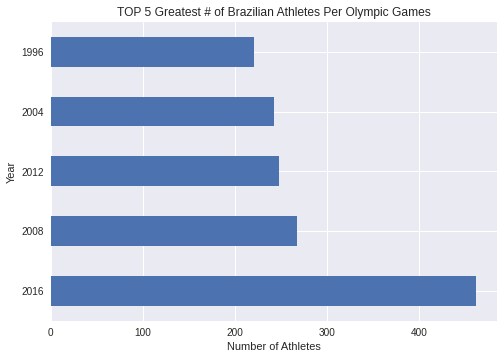

In [67]:
# TOP 5 Greatest # of Brazilian Athletes Per Olympic Games
df_br.groupby("Year")["Name"].nunique().sort_values(ascending=False).head(5).plot.barh(title="TOP 5 Greatest # of Brazilian Athletes Per Olympic Games")
plt.xlabel("Number of Athletes")
plt.ylabel("Year");

475 is the total number of Medals Brazilian athletes won in the Olympic Games, from which 109 are GOLD, 175 are SILVER and 191 are BRONZE.

In [68]:
# What is the total number of medals Brazil won in the Olympic Games?
df_br["Medal"].loc[df_br["Medal"].notnull()].count()

475

In [69]:
# How many Gold, Silver and Bronze medals Brazil won in the Olympic Games?
df_br.groupby("Medal")["Medal"].count().sort_values(ascending=True).reset_index(name="Count")

,Medal,Count
0,Gold,109
1,Silver,175
2,Bronze,191


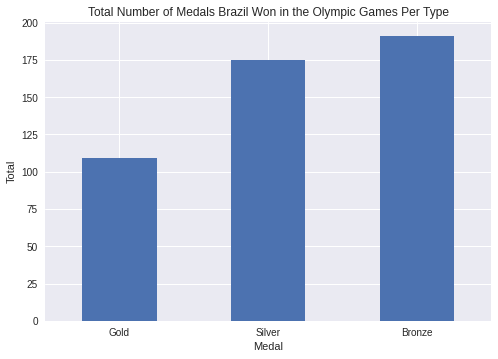

In [70]:
# Gold vs. Silver vs. Bronze medals Brazil won in the Olympic Games
df_br.groupby("Medal")["Medal"].count().sort_values(ascending=True).plot.bar(title="Total Number of Medals Brazil Won in the Olympic Games Per Type")
plt.ylabel("Total")
plt.xticks(rotation="horizontal");

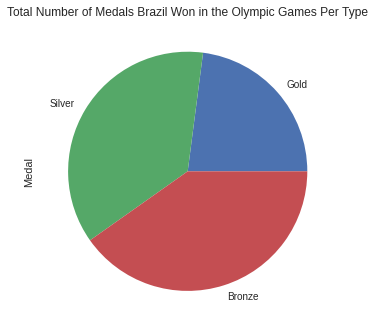

In [71]:
# Gold vs. Silver vs. Bronze medals Brazil won in the Olympic Games
df_br.groupby("Medal")["Medal"].count().sort_values(ascending=True).plot.pie(title="Total Number of Medals Brazil Won in the Olympic Games Per Type");

Torben Grael and Rober Scheidt (Sailing) are the Brazilian athletes with the greatest number of medals 5, followed by Gustavo Borges (Swimming) and Serginho (Volleyball) with 4 medals each.

In [72]:
# What Brazilian athletes won the greatest number of medals?
df_br.loc[df_br["Medal"].notnull()].groupby(["Name","Sport"])["Medal"].count().sort_values(ascending=False).head(4).reset_index(name="Total of Medals")

,Name,Sport,Total of Medals
0,Torben Schmidt Grael,Sailing,5
1,Robert Scheidt,Sailing,5
2,Gustavo Frana Borges,Swimming,4
3,"Srgio ""Escadinha"" Dutra dos Santos",Volleyball,4


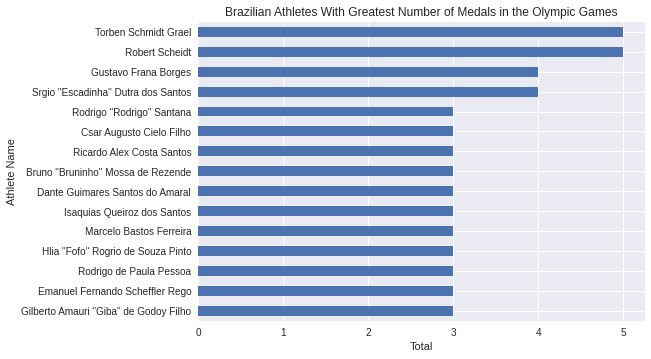

In [73]:
# Brazilian athletes that won the greatest number of medals
df_br.loc[df_br["Medal"].notnull()].groupby("Name")["Medal"].count().sort_values(ascending=True).tail(15).plot.barh(title="Brazilian Athletes With Greatest Number of Medals in the Olympic Games")
plt.xlabel("Total")
plt.ylabel("Athlete Name");

### 5.2 - Part 2 - Analyzing diversity in terms of athletes' gender, age and sports.

*   Talita de Alencar Rodrigues is the youngest Brazilian athlete to participate in the Olympic Games in 1948 (London), although she didn't win a medal;
*   There are 7 Brazilian athletes who classify as the youngest Brazilian athletes to win an Olympic medal at 18 years old:
 - In 1980 (Moskva), Jorge Luiz Fernandes Leite (Swimming) - Bronze;
 - In 2000 (Sydney), Tiago Camilo (Judo) - Silver;
 - In 2004 (Athina), Marta Silva and Renata Costa (Football) - Silver;
 - In 2008 (Beijing), Alexandre Pato, Breno and Francielle (Football) - Bronze.
* Nelson Pessoa Filho (Equestrianism) is the oldest Brazilian athlete to participate in the Olympic Games in 1992 (Barcelona), although he didn't win a medal;
* Sebastio Wolf (Shooting) is the oldest Brazilian athlete to win a medal (Bronze) in the Olympic Games in 1920 (Antiwerpen).
* The number of men (1486) representing Brazil in the Olympic Games is almost 3x more than the number of women (567);
* Out of the 475 medals Brazil won, 340 medals were by men vs. 135 by women;


Talita de Alencar Rodrigues is the youngest Brazilian athlete to participate in the Olympic Games in 1948 (London), although she didn't earn a medal.


In [74]:
# Who is the youngest Brazilian athlete to participate in the Olympic Games?
df_br[["ID","Name","Sex","Age","Team","NOC","Games","City","Sport","Event","Medal",]].nsmallest(1,"Age")

,ID,Name,Sex,Age,Team,NOC,Games,City,Sport,Event,Medal
202471,101697,Talita de Alencar Rodrgues,F,13.0,Brazil,BRA,1948 Summer,London,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN


There are 7 Brazilian athletes who classify as the youngest Brazilian athletes to earn an Olympic medal at 18 years old:

- In 1980 (Moskva), Jorge Luiz Fernandes Leite (Swimming) - Bronze;

- In 2000 (Sydney), Tiago Camilo (Judo) - Silver;

- In 2004 (Athina), Marta Silva and Renata Costa (Football) - Silver;

- In 2008 (Beijing), Alexandre Pato, Breno and Francielle (Football) - Bronze.


In [75]:
# Who is the youngest Brazilian athlete to win a medal in the Olympic Games?
df_br[["ID","Name","Sex","Age","Team","NOC","Games","City","Sport","Event","Medal"]].loc[df_br["Medal"].notnull()].nsmallest(7,"Age")

,ID,Name,Sex,Age,Team,NOC,Games,City,Sport,Event,Medal
4561,2592,"Alexandre ""Alexandre Pato"" Rodrigues da Silva",M,18.0,Brazil,BRA,2008 Summer,Beijing,Football,Football Men's Football,Bronze
28902,14958,Breno Vinicius Rodrigues Borges,M,18.0,Brazil,BRA,2008 Summer,Beijing,Football,Football Men's Football,Bronze
34252,17650,Tiago Henrique de Oliveira Camilo,M,18.0,Brazil,BRA,2000 Summer,Sydney,Judo,Judo Men's Lightweight,Silver
72041,36651,Francielle Manoel Alberto,F,18.0,Brazil,BRA,2008 Summer,Beijing,Football,Football Women's Football,Silver
122812,62079,"Renata Aparacida ""Kki"" da Costa",F,18.0,Brazil,BRA,2004 Summer,Athina,Football,Football Women's Football,Silver
136263,68536,Jorge Luiz Fernandes Leite,M,18.0,Brazil,BRA,1980 Summer,Moskva,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
150395,75451,Marta Vieira da Silva,F,18.0,Brazil,BRA,2004 Summer,Athina,Football,Football Women's Football,Silver


Nelson Pessoa Filho (Equestrianism) is the oldest Brazilian athlete to participate in the Olympic Games in 1992 (Barcelona), although he didn't win a medal.

In [76]:
# Who is the oldest Brazilian athlete to participate in the Olympic Games?
df_br[["ID","Name","Sex","Age","Team","NOC","Games","City","Sport","Event","Medal"]].nlargest(2,"Age")

,ID,Name,Sex,Age,Team,NOC,Games,City,Sport,Event,Medal
186471,93749,Nelson Pessoa Filho,M,56.0,Brazil,BRA,1992 Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN
186472,93749,Nelson Pessoa Filho,M,56.0,Brazil,BRA,1992 Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN


Sebastio Wolf (Shooting) is the oldest Brazilian athlete to win a medal (Bronze) in the Olympic Games in 1920 (Antiwerpen).

In [77]:
# Who is the oldest Brazilian athlete to win a medal in the Olympic Games?
df_br[["ID","Name","Sex","Age","Team","NOC","Games","City","Sport","Event","Medal"]].loc[df_br["Medal"].notnull()].nlargest(1,"Age")

,ID,Name,Sex,Age,Team,NOC,Games,City,Sport,Event,Medal
262475,131327,Sebastio Wolf,M,51.0,Brazil,BRA,1920 Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze


The number of men (1486) representing Brazil in the Olympic Games is almost 3x more than the number of women (567).

In [78]:
# Comparing Number of Men vs. Women Brazilian atheletes that participated in the Olympic Games.
df_br.groupby("Sex")["ID"].nunique().reset_index(name="Number of Athletes")

,Sex,Number of Athletes
0,F,567
1,M,1486


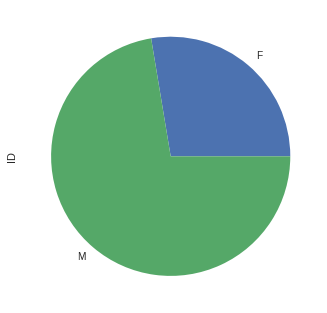

In [79]:
# Men vs. Women Brazilian atheletes that participated in the Olympic Games.
df_br.groupby("Sex")["ID"].nunique().plot.pie();

Out of the 475 medals Brazil earned, 340 medals were by men vs. 135 by women;

In [80]:
# Comparing total number of medals - Men vs. Women Brazilian atheletes - in the Olympic Games.
df_br.groupby(["Sex"])["Medal"].count().sort_values(ascending=False).reset_index(name="Number of Medals")

,Sex,Number of Medals
0,M,340
1,F,135


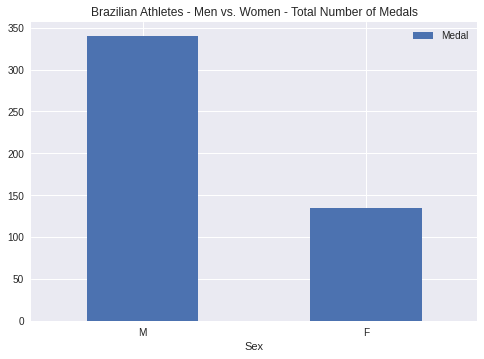

In [81]:
# Total number of medals - Men vs. Women - Brazilian atheletes in the Olympic Games.
df_br.groupby(["Sex"])["Medal"].count().sort_values(ascending=False).plot.bar(title="Brazilian Athletes - Men vs. Women - Total Number of Medals")
plt.xticks(rotation="horizontal")
plt.legend();


The TOP 5 sports Brazil has better performed in the Olympic Games are Athletics, Sailing, Swimming, Judo and Volleyball respectively.

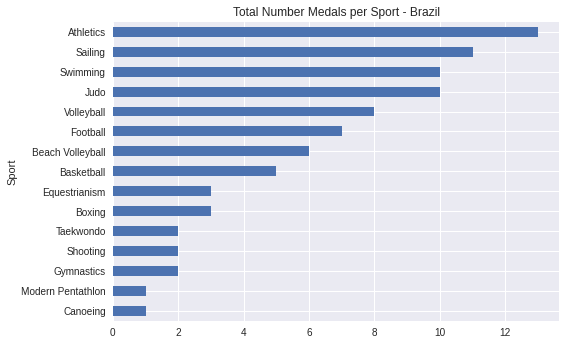

In [82]:
# Total Number Medals per Sport - Brazil
df_br[["ID","Name","Sex","Age","Team","NOC","Games","Sport","Event","Medal"]].loc[df_br["Medal"].notnull()].groupby(["Sport"])["Games"].nunique().sort_values( ascending=True).plot.barh(title="Total Number Medals per Sport - Brazil");

Creating a new csv file "df_br_athletes_events.csv" in the datasets folder, which only contains a subset of the original dataset with Brazil related athletes/medals info only, used in this analysis.

In [83]:
# Saving new dataframe df_br in a separate csv file, which only contains Brazil related athletes/medals info.
df_br.to_csv("/content/drive/MyDrive/Colab Notebooks/DIO_ProjetoPandas/datasets/df_br_athletes_events.csv", index=False)

## 6. Conclusion
### Although throughout the years Brazil improved in number of athletes participating in the Olympic Games as well as the overall performance is getting better, there are still lots of improvement areas, such as:
* Encourage and support more women to participate in all sports;
* Invest in all athletes and their respective sports, especially those that have less representation;
* Prepare kids to grow strong and seriously engage in Olympic Games, which may help increase our chances to have better athletes to compete in the future;
* etc.